# Extract the PSF  some stars in HD163466 field
=====================================================================

- Creation : Friday 2016 June 24th
- Author Sylvie Dagoret-Campagne 
- affiliation : LAL/IN2P3/CNRS

PSF of HD163466 with grating


## 1) Import package

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

import ccdproc
print 'ccdproc version',ccdproc.__version__

from astropy.modeling import models

ccdproc version 1.0.1


In [2]:
import photutils
from astropy.stats import sigma_clipped_stats
from photutils import daofind
from photutils import CircularAperture
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

In [3]:
#photutils.test()

In [4]:
from scipy import stats 
from scipy import ndimage
import os
from datetime import datetime, timedelta

In [5]:
import libMonocamBaseImages           # my tool library written to do that CCD reduction

In [6]:
now=datetime.utcnow()  # choose UTC time
datestr=str(now)
print 'standard date format for the analysis :',datestr
#  want the following format '2016-05-10T11:55:27.267'
date_of_analysis=now.strftime('%Y-%m-%dT%H:%M:%S')
print 'fits date format for the analysis : ',date_of_analysis

standard date format for the analysis : 2016-06-29 12:36:19.500064
fits date format for the analysis :  2016-06-29T12:36:19


## 3) Configuration of the input file

- HD158485_grat_science.fits
- HD159222_grat_science.fits
- HD163466_grat_science.fits


In [7]:
#object_name='HD158485_grat_20'
#object_name='HD159222_grat'
object_name='HD163466_grating'

In [8]:
path='./HD163466_grating'
basefilename='AssScImHD163466_grating_1.fits' # check master bias
filename=os.path.join(path,basefilename)

## 4) Read the images

In [9]:
allimages = []
ccd_chan = ccdproc.CCDData.read(filename, hdu=0,unit='adu') 
allimages.append(ccd_chan)

data=ccd_chan.data

## 5) Shows the images

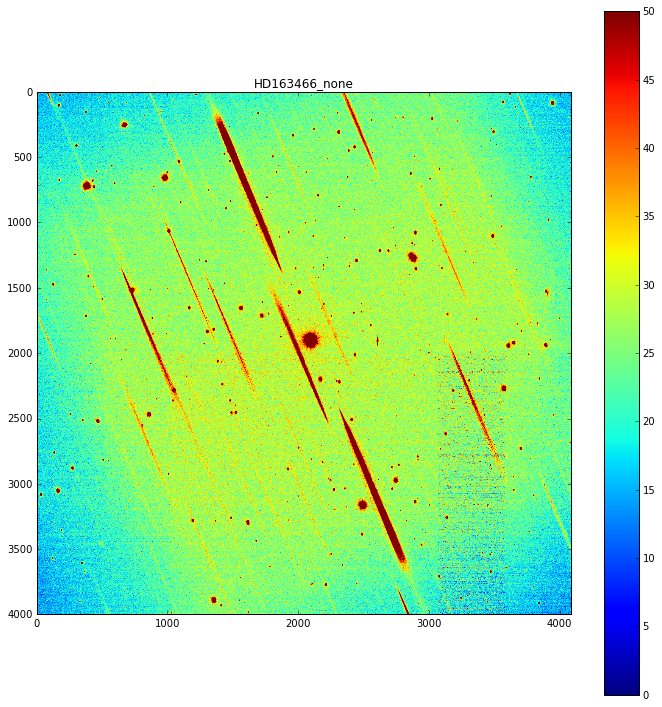

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
img=ax.imshow(ccd_chan,vmin=0,vmax=50.)
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)
#plt.savefig(outputfigfilename3)

# 6) Subtract background

code implemented from photutil information there:
https://photutils.readthedocs.io/en/latest/photutils/background.html#

In [11]:
from photutils.background import Background2D
bkg = Background2D(data, (100, 100), filter_size=(3, 3),method='median')

### does the background varies over the field of view ?

In [12]:
print('median background = ',bkg.background_median)
print('median rms = ',bkg.background_rms_median)

('median background = ', 26.147392085323538)
('median rms = ', 3.4203295857040175)


### Radiography of the residual background

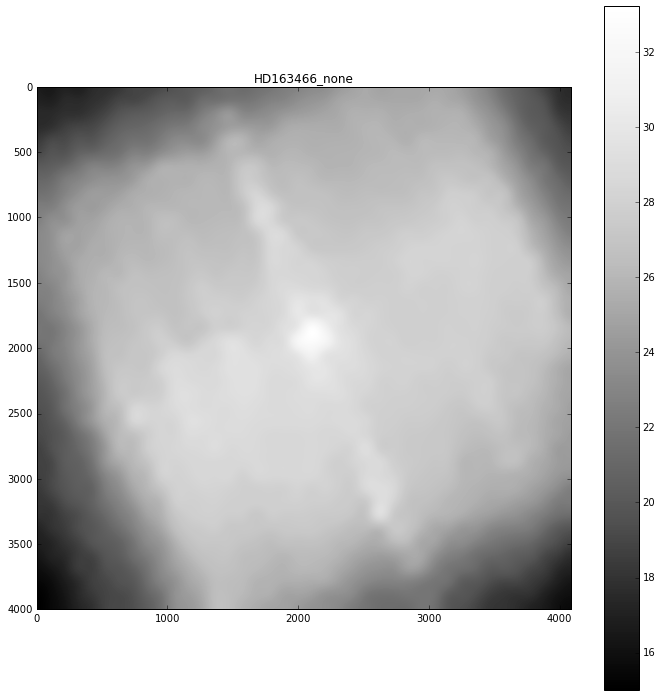

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(bkg.background, origin='lower', cmap='Greys_r')
img=ax.imshow(bkg.background, cmap='Greys_r')
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)

### Now subtract residual the background

In [14]:
data2=data - bkg.background

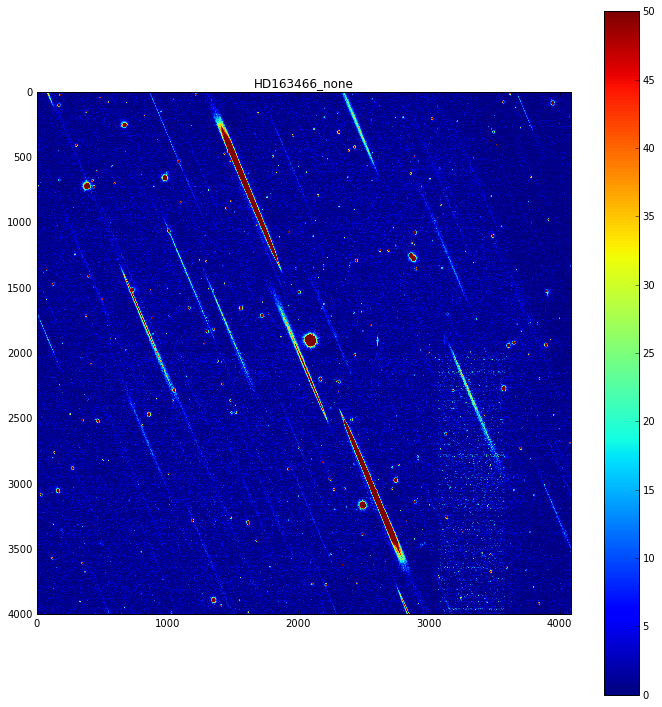

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(bkg.background, origin='lower', cmap='Greys_r')
img=plt.imshow(data2, vmin=0,vmax=50.)
#img=plt.imshow(data2)
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)

## 8.) Compute signal and noise

In [16]:
mean, median, std = sigma_clipped_stats(data2, sigma=10.0, iters=5)    
print(mean, median, std)    

(0.078311718943030226, -0.25620272093794227, 4.6678017922235515)


In [17]:
sources = daofind(data2 - median, fwhm=3.0, threshold=50.*std)
sources.sort('flux')
print(sources)   

 id   xcentroid     ycentroid   ...      peak          flux           mag       
--- ------------- ------------- ... ------------- ------------- ----------------
 62 2483.53959719 3387.04086516 ...  617.14490722 1.01165624386 -0.0125824157567
 63 2206.88668637 3773.56621781 ... 629.651919251 1.01441840792 -0.0155428035927
  6 3058.80426724  288.52577181 ... 285.339954016 1.02027590487 -0.0217940758711
 44 2309.00680401 2221.82019024 ... 733.576244058 1.05731298084 -0.0605089103961
 58 3129.91712752 3258.28361974 ... 709.638871404 1.06765441529 -0.0710767510626
 18 2888.56227367 1080.51898422 ... 939.573387936 1.11044903685  -0.113746579377
 23 2893.40093204 1356.06460505 ... 801.573721029 1.12047478475  -0.123505218958
  5 3058.84470926 280.893120167 ... 342.177689553 1.13973429033  -0.142009036905
 50 467.634056189 2524.31542513 ... 925.051839635 1.16067457998  -0.161776182575
 16 434.991282169 731.437799965 ... 885.493962403 1.21206678883  -0.208816378828
...           ...           

In [18]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
62,2483.53959719,3387.04086516,0.420654505098,-0.259088189722,0.148935648123,25.0,0.0,617.14490722,1.01165624386,-0.0125824157567
63,2206.88668637,3773.56621781,0.376836797162,-0.279320943446,0.178195936693,25.0,0.0,629.651919251,1.01441840792,-0.0155428035927
6,3058.80426724,288.52577181,0.615748540989,-0.409173096551,0.111660851909,25.0,0.0,285.339954016,1.02027590487,-0.0217940758711
44,2309.00680401,2221.82019024,0.369398039571,-0.127000824717,0.543536579125,25.0,0.0,733.576244058,1.05731298084,-0.0605089103961
58,3129.91712752,3258.28361974,0.379892909436,-0.26562173972,0.407239502777,25.0,0.0,709.638871404,1.06765441529,-0.0710767510626
18,2888.56227367,1080.51898422,0.387807776286,-0.374295798556,0.334629698768,25.0,0.0,939.573387936,1.11044903685,-0.113746579377
23,2893.40093204,1356.06460505,0.429658797687,-0.119191156729,0.439950819298,25.0,0.0,801.573721029,1.12047478475,-0.123505218958
5,3058.84470926,280.893120167,0.777118154351,0.446022690725,0.641702359935,25.0,0.0,342.177689553,1.13973429033,-0.142009036905
50,467.634056189,2524.31542513,0.445703464819,-0.125152319684,0.119624953639,25.0,0.0,925.051839635,1.16067457998,-0.161776182575


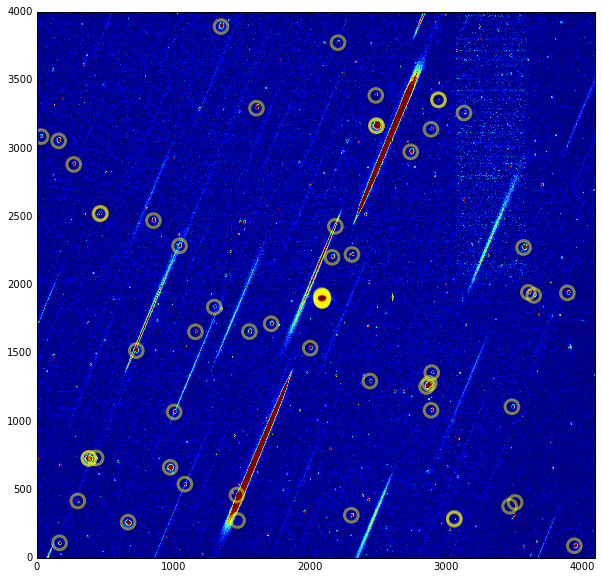

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=50.)
norm = ImageNormalize(stretch=SqrtStretch())
ax.imshow(data2,vmin=0,vmax=50.,origin='lower')
#ax.imshow(data, cmap='Greys', origin='lower', norm=norm)
apertures.plot(color='yellow', lw=3., alpha=0.5)

### For example shows the 25 first stars

In [20]:
NBSTARS=25
XX=np.zeros(NBSTARS)
YY=np.zeros(NBSTARS)
selected_stars=sources.as_array()
NBFOUNDSTARS=np.min([NBSTARS,selected_stars.shape[0]])
for istar in range(NBFOUNDSTARS):
    XX[istar] = int(selected_stars[istar][1])
    YY[istar] = int(selected_stars[istar][2])   
    print XX[istar],YY[istar]

2483.0 3387.0
2206.0 3773.0
3058.0 288.0
2309.0 2221.0
3129.0 3258.0
2888.0 1080.0
2893.0 1356.0
3058.0 280.0
467.0 2524.0
434.0 731.0
1162.0 1655.0
31.0 3085.0
2888.0 3138.0
2440.0 1294.0
2304.0 311.0
2942.0 3355.0
1300.0 1836.0
2943.0 3353.0
1084.0 539.0
3480.0 1105.0
1466.0 459.0
2003.0 1535.0
462.0 2518.0
3640.0 1922.0
300.0 415.0


## Work with one PSF of one star

In [50]:
# Extract the plot of a PSF
index=0

onepsf=data2[YY[index]-10:YY[index]+10,XX[index]-10:XX[index]+10]
onepsfX=onepsf.sum(axis=0)
onepsfY=onepsf.sum(axis=1)

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


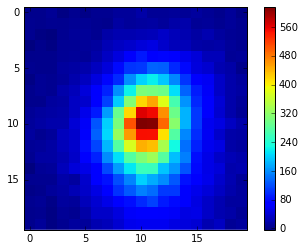

In [51]:
im=plt.imshow(onepsf,interpolation='None')
#im=plt.imshow(onepsf)
plt.colorbar(im)

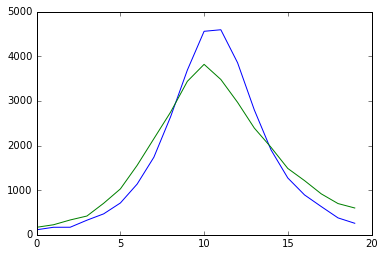

In [52]:
plt.plot(onepsfX)
plt.plot(onepsfY)

In [24]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (average, np.sqrt(variance))

In [25]:
DELTA_NBINSX=10
DELTA_NBINSY=10

In [53]:
weighted_avg_and_std(np.arange(onepsfX.shape[0]),onepsfX)

(10.569248590819333, 3.2432102969030487)

In [54]:
weighted_avg_and_std(np.arange(onepsfY.shape[0]),onepsfY)

(10.502906047192884, 3.7979940145095465)

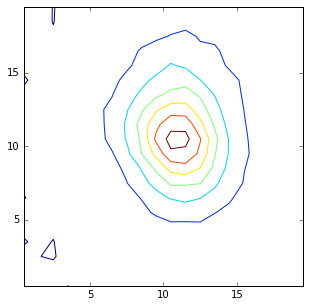

In [55]:
plt.figure(figsize=(5,5))
#onepsf2 = onepsf / np.linalg.norm(onepsf, axis=-1)[:, np.newaxis]
onepsf2 = onepsf / np.sum(onepsf)
levels=np.array([1,0.682,0.75,0.89,0.94,0.96,0.97])
#plt.contour(onepsf2,levels=levels,origin='lower') matmpltlib bug
plt.contour(onepsf2,origin='lower')

In [56]:
XV=np.arange(2*DELTA_NBINSX)-DELTA_NBINSX
YV=np.arange(2*DELTA_NBINSY)-DELTA_NBINSY
Xgrid,Ygrid=np.meshgrid(XV,YV)

In [57]:
weighted_avg_and_std(Xgrid,onepsf2)

(0.56924859081933166, 3.2432102969030492)

In [58]:
weighted_avg_and_std(Ygrid,onepsf2)

(0.50290604719288146, 3.7979940145095465)

### Estimation of PRF (PSF) for a bunch of stars


I could not use any of the utilities function.
It lacks of working examples

In [32]:
import photutils.psf 
from photutils.psf import psf_photometry

In [33]:
from astropy.modeling import models, fitting

In [34]:
import photutils
from photutils import psf

photutils.__version__

u'0.3.dev1833'

### Extraction of a few stars for visualization

In [35]:
DELTA_NBINSX=10
DELTA_NBINSY=10

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


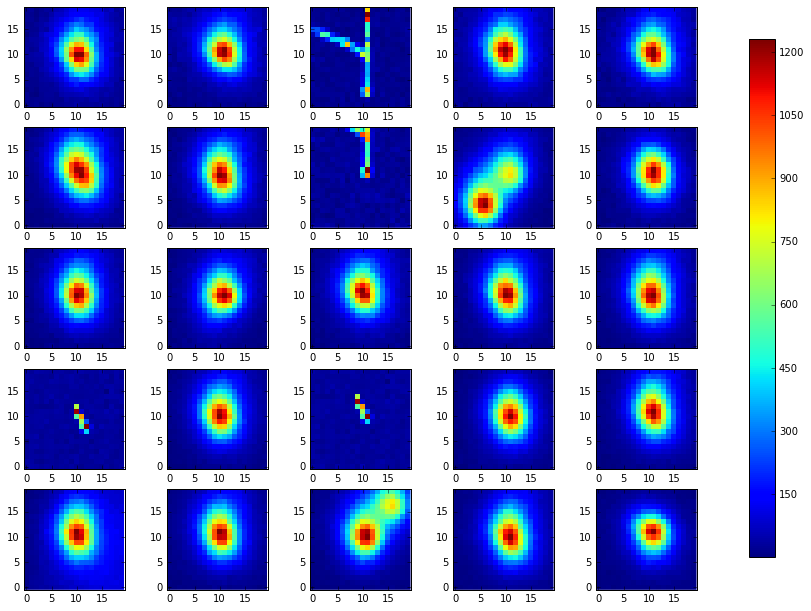

In [36]:
fig, axes = plt.subplots(nrows=5, ncols=5)
fig.set_size_inches(12, 9)
# Plot kernels
for i in range(5):
    for j in range(5):
        index=5*i+j
        if index <NBFOUNDSTARS :
            prf_image = data2[YY[index]-DELTA_NBINSY:YY[index]+DELTA_NBINSY,XX[index]-DELTA_NBINSX:XX[index]+DELTA_NBINSX]
            im = axes[i, j].imshow(prf_image, interpolation='None',origin='lower')
			
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
plt.colorbar(im, cax=cax)
plt.subplots_adjust(left=0.05, right=0.85, top=0.95, bottom=0.05)
plt.show()

In [37]:
selected_stars=sources.as_array()

NB_OF_STARS=selected_stars.shape[0]
SIGMAX_OF_STARS=np.zeros(NB_OF_STARS)
SIGMAY_OF_STARS=np.zeros(NB_OF_STARS)
for istar in range(selected_stars.shape[0]):
    XXs = int(selected_stars[istar][1])
    YYs = int(selected_stars[istar][2])   
    star_image = data2[YYs-DELTA_NBINSY:YYs+DELTA_NBINSY,XXs-DELTA_NBINSX:XXs+DELTA_NBINSX]
    thepsf = star_image / np.sum(star_image)
    SIGMAX_OF_STARS[istar]=weighted_avg_and_std(Xgrid,thepsf)[1]
    SIGMAY_OF_STARS[istar]=weighted_avg_and_std(Ygrid,thepsf)[1]

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


In [38]:
SIGMAX_OF_STARS

array([ 3.2432103 ,  3.32833742,  3.18582777,  3.27682331,  3.27070222,
        3.39768198,  3.26336146,  0.86356581,  3.90766183,  3.22203079,
        3.21738324,  3.28008938,  3.30497534,  3.25771143,  3.26959561,
               nan,  3.23109113,         nan,  3.21194167,  3.24256405,
        3.83859661,  3.25015706,  3.74207623,  3.29301326,  3.14036774,
        3.275786  ,  3.20713003,         nan,  3.27725214,         nan,
        3.25532769,  3.26613095,  3.33426915,         nan,  3.12400658,
        3.34357372,  4.24497203,  3.23708241,  3.27917054,  3.31692909,
        3.23380697,  3.22025387,  3.30019464,  3.29848779,  3.25483943,
        3.28627509,  3.20608007,  3.30146611,  3.18981574,  3.1560862 ,
        3.54981338,  3.91363291,  3.19631728,  4.00198485,  3.9906088 ,
        3.39198727,  3.27469115,  3.27469115,  2.95500824,  3.19404637,
        2.89695428,  3.62646764,  2.24934832,  2.31983303])

In [39]:
SIGMAY_OF_STARS

array([ 3.79799401,  3.6003482 ,  4.70064663,  3.8656145 ,  3.775751  ,
        3.97250795,  3.9514459 ,  3.55192811,  4.51221715,  3.65641056,
        3.83527704,  3.75776212,  3.79812494,  3.92181269,  3.99125019,
               nan,  3.85150417,         nan,  3.81264269,  3.92729478,
        4.44813333,  3.84180072,  4.04219171,  3.96644068,  3.35464677,
        3.89894219,  3.80347207,         nan,  3.92369885,         nan,
        3.88553341,  3.96412933,  3.87702942,         nan,  3.29978548,
        4.06108804,  4.94697796,  3.81345577,  3.96105179,  3.83426703,
        3.82034896,  3.70454972,  3.82113436,  3.9790653 ,  3.82050488,
        3.93081763,  3.68356405,  3.95339551,  3.79953436,  3.36941537,
        5.58001916,  5.56412507,  3.61776945,  5.51275219,  5.53828672,
        5.53768727,  3.79217376,  3.79217376,  5.48893355,  3.60023244,
        5.40275339,  5.58518499,  4.65341277,  4.67209303])

#### Cut NAN

In [40]:
all_sigx=SIGMAX_OF_STARS[np.logical_not(np.isnan(SIGMAX_OF_STARS))]
all_sigy=SIGMAY_OF_STARS[np.logical_not(np.isnan(SIGMAY_OF_STARS))]

#### Cut too low values

In [41]:
all_sigx=all_sigx[all_sigx>2.0]
all_sigy=all_sigy[all_sigy>2.0]

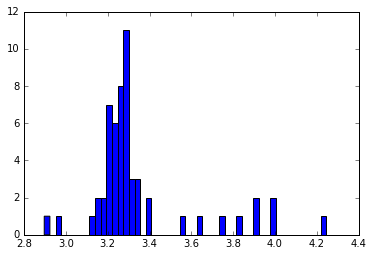

In [42]:
h1=plt.hist(all_sigx,50)

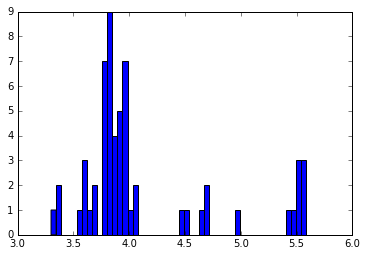

In [43]:
h1=plt.hist(all_sigy,50)

In [44]:
all_sigx.mean()

3.3437560604252137

In [47]:
print 'average prf(x) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(all_sigx.mean(),all_sigx.std(),all_sigx.mean()*0.4*2.36,all_sigx.std()*0.4*2.26)
print 'average prf(y) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(all_sigy.mean(),all_sigy.std(),all_sigy.mean()*0.4*2.36,all_sigy.std()*0.4*2.26)

average prf(x) = 3.34 +/- 0.26 pixels ==> psf  3.16 +/- 0.23 arcsec 
average prf(y) = 4.13 +/- 0.63 pixels ==> psf  3.89 +/- 0.57 arcsec 


In [48]:
print 'average prf(x) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(np.median(all_sigx),all_sigx.std(),np.median(all_sigx)*0.4*2.36,all_sigx.std()*0.4*2.26)
print 'average prf(y) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(np.median(all_sigy),all_sigy.std(),np.median(all_sigy)*0.4*2.36,all_sigy.std()*0.4*2.26)

average prf(x) = 3.27 +/- 0.26 pixels ==> psf  3.09 +/- 0.23 arcsec 
average prf(y) = 3.89 +/- 0.63 pixels ==> psf  3.67 +/- 0.57 arcsec 
